# Lab1

Task 1

read the text file called dna_raw.txt
- each sequene is composed of two lines of data: the first line beginning with > sign is the
sequence ID, while the following line is the actual sequence
- the actual sequence is not case-sensitive, which means that lower and upper case letters are
treated the same

- for each sequence, create a dictionary to count the number of each DNA letter in that sequence

- for each sequence, graph the frequency of DNA letters for each sequence

Task 2

- there can be raw DNA data files with different number of sequences. Based on your solution code
above, create a function that is able to take in new data files in similar format as dna_raw.txt with
different number of sequences, and produce the same results above

- you have received also another DNA codes that is more complicated. The file is called
dna_raw_complicated.txt. In this file, each DNA sequence can be composed of multiple lines of data in
the text file. In this case, are you able to solve the task in the same way as before? If not, update your
code to solve the same task with the new data

FileNotFoundError: [Errno 2] No such file or directory: 'graphs_SAMPLE1_dna_raw_test.txt.png'

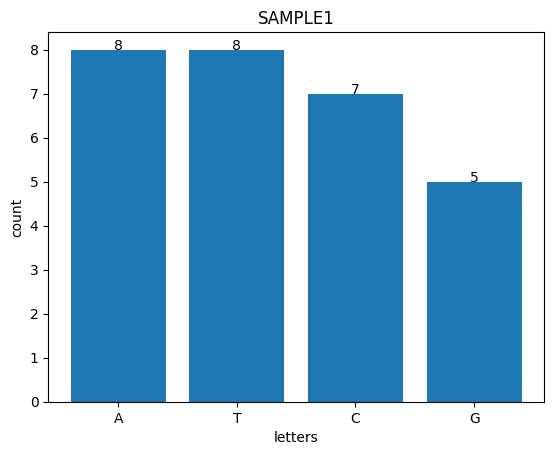

In [ ]:
#this code works for both task 1 and 2

import matplotlib.pyplot as plt #importera matplotlib
import os #importera os så kan raera gamla png filer


def load_dna_file(file): #skapa funktionen dna_files som tar emot parameter file
    #1. Bygga funktion för att hämta data som går att återanvända
    #2. Allt till stora bokstäver
    try: #error handling ifall filen inte finns
        with open(file, 'r') as f: 
            lines = f.readlines() #läs alla rader av filen
        return [line.upper().rstrip() for line in lines] #Stora bokstäver, ta bort \n för alla rader

    except FileNotFoundError:
        print('file not found')
        return [] #så man vet direkt om filen inte finns
 

def sort_to_dictionary(file_contents):
    #4. Skapa dictionary

    dictionary = {}
    #sequence_counter = 0 #försöker få den att fatta att den ska börja bygga nya grapher om det är olika filer
    #5. lägg in fil i dictionary

    #Räkna antalet DNA letters i den sekvensen
    for part in file_contents:
        if part[0] == '>':
            sequence_name = part[1:] #hitta sekvensnamn, ta alla från 1 -> slutet i de rader som börjar med >
            dictionary[sequence_name] = {
                'A':0, 
                'T':0,
                'C':0, 
                'G':0
                } #nolla för den här nya sekvensen 
        else:
            for letter in part:
                if letter == 'A' or letter == 'T' or letter == 'C' or letter == 'G':#se till att alla bkstäver är rätt
                    dictionary[sequence_name][letter] += 1 #lägga till i nested dictionary
    return dictionary


def bar_chart(sequences):
    #6. Rita ut graf för varje frekvens 
    #Måste först plocka ut alla värden fast fortfarande ha de kopplade till rätt sekvens

    for sequence in sequences: #loopa igenom alla sekvenser
        #x = dictionary[sequence].keys() #hämta vilken bokstav det gäller
        #y = dictionary[sequence].values() #hämta hur många antal av den bokstaven
        x = list(sequences[sequence].keys())     # göra om till lista så att kunna ha siffror över funkar
        y = list(sequences[sequence].values())   # göra om till lista så att kunna ha siffror över funkar

        plt.bar(x, y) #berätta vilka värden som ska användas

        for i in range(len(x)):# lägga till siffror över stapeln
            plt.text(i, y[i], str(y[i]), ha='center')

        plt.title(sequence)#bestämma titel
        plt.xlabel('letters')#titel för x
        plt.ylabel('count')#tiel för y

        if os.path.exists(f'graphs_{sequence}_{file_name}.png'):
            os.remove(f'graphs_{sequence}_{file_name}.png') #ta bort gamla filer

        plt.savefig(f'graphs_{sequence}_{file_name}.png')#skapa en ny png fil för att kunna spara 
        plt.clf() #rensa allt för att kunna börja oom på nya grafen.



#köra programmet


#files = ['dna_raw.txt', 'dna_raw_complicated.txt'] #lista med textfilerna så båda körs samtidigt
files = ['dna_raw_test.txt']

for file_name in files:
    loaded_file = load_dna_file(file_name) #starta funktionen
    sorted_dictionary = sort_to_dictionary(loaded_file)
    bar_chart(sorted_dictionary)

print('check separate files:)')

